## Quarkus Vs Spring 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Application start time

In [2]:
startTimesDF = pd.read_csv("appStartTimes.csv")
print(startTimesDF)

            Framework      1      2      3      4      5      6      7      8  \
0     app-quarkus-jvm  3.665  1.737  1.716  1.715  1.667  1.877  1.811  1.676   
1     app-spring-boot  3.807  2.724  2.856  2.891  2.819  2.760  2.732  2.744   
2  app-quarkus-native  0.892  0.013  0.016  0.014  0.014  0.012  0.012  0.014   

       9     10     11  
0  1.895  1.793  1.921  
1  2.758  2.818  2.908  
2  0.014  0.012  0.013  


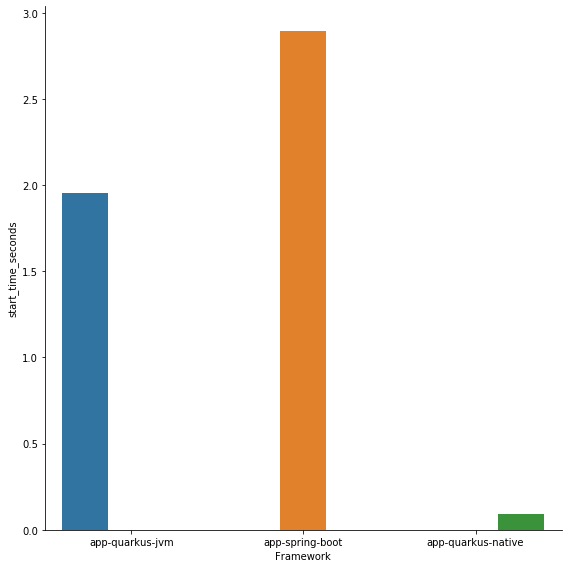

In [7]:
startTimesDF['start_time_seconds'] = startTimesDF.mean(axis=1)

startTimesPlot = sns.catplot(x='Framework', y='start_time_seconds', hue='Framework', kind='bar', data=startTimesDF ,height=8)
startTimesPlot.savefig("startTimesPlot.png")

### Application RAM memmory usage

In [9]:
appRam = pd.read_csv("appMemUsage.csv")
print(appRam)

            Framework  Mem_usage_at_rest_mb   Max_mem_usage_max_mb
0     app-quarkus-jvm                97.340                  418.2
1     app-spring-boot               287.300                  601.5
2  app-quarkus-native                 6.488                  282.5


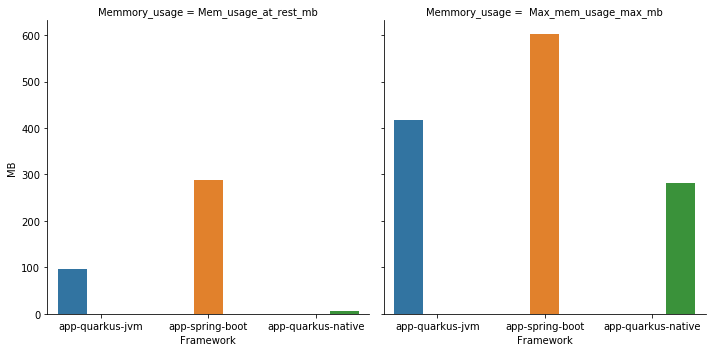

In [27]:
appRamMelted = appRam.melt('Framework', var_name='Memmory_usage',  value_name='MB')

appRamPlot = sns.catplot(x="Framework", y="MB",
                hue="Framework", col="Memmory_usage",
                data=appRamMelted, kind="bar",
                height=5, aspect=1);
appRamPlot.savefig("appRamPlot.png")

### Application artifact size

In [49]:
appSizes = pd.read_csv("appPackageSizes.csv")
print(appSizes)

            Framework    size_mb
0     app-quarkus-jvm  23.388866
1     app-spring-boot  26.882397
2  app-quarkus-native  47.413896


            Framework  variable         Mb
0     app-quarkus-jvm   size_mb  23.388866
1     app-spring-boot   size_mb  26.882397
2  app-quarkus-native   size_mb  47.413896


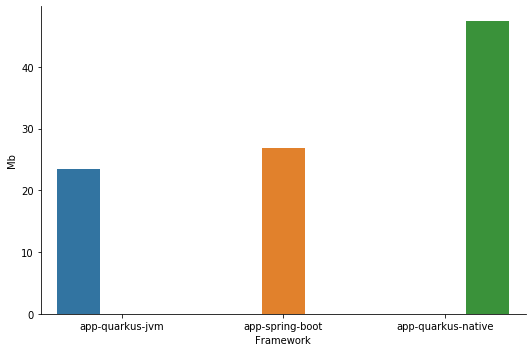

In [50]:
appSizesMelted = appSizes.melt('Framework',   value_name='Mb')
print(appSizesMelted)

appSizesPlot = sns.catplot(x="Framework", y="Mb",
                hue="Framework", 
                data=appSizesMelted, kind="bar",
                height=5, aspect=1.5);
appSizesPlot.savefig("appSizesPlot.png")

### Spring Boot application performance 

In [844]:
springBootPerfGetDF = pd.read_csv("reportSpringGet.csv")
springBootPerfGetDF['HTTP_method'] = 'GET'
springBootPerfGetDF['requests_per_sec'] = 3239.68
springBootPerfGetDF.T

,0
latency_min,0.303
latency_max,441.14
latency_mean,11.4054
latency_stdev,45567.2
latency_p50,2.837
latency_p90,10.651
latency_p95,20.349
latency_p99,307.525
rps,3239.68
duration,10003142


In [845]:
springBootPerfPostDF = pd.read_csv("reportSpringPost.csv")
springBootPerfPostDF['HTTP_method'] = 'POST'
springBootPerfPostDF['requests_per_sec'] = 1623.40
springBootPerfPostDF.T

,0
latency_min,0.449
latency_max,429.639
latency_mean,14.4134
latency_stdev,46060.3
latency_p50,5.715
latency_p90,16.142
latency_p95,27.158
latency_p99,310.95
rps,1623.4
duration,10003694


In [846]:
springBootPerfDF = pd.concat([springBootPerfGetDF, springBootPerfPostDF],axis=0, ignore_index=True)
springBootPerfDFRenamed = springBootPerfDF.rename(index={0: 'GET', 1 : 'POST'})
          
springBootPerfDFRenamed.T

,GET,POST
latency_min,0.303,0.449
latency_max,441.14,429.639
latency_mean,11.4054,14.4134
latency_stdev,45567.2,46060.3
latency_p50,2.837,5.715
latency_p90,10.651,16.142
latency_p95,20.349,27.158
latency_p99,307.525,310.95
rps,3239.68,1623.4
duration,10003142,10003694


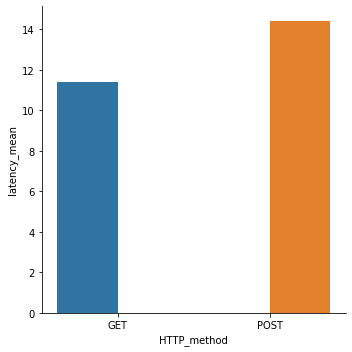

In [847]:
sns.catplot(x='HTTP_method', y='latency_mean', hue='HTTP_method', kind='bar', data=springBootPerfDFRenamed)


### Quarkus JVM application performance

In [848]:
quarkusJVMPerfGetDF = pd.read_csv("reportQuarkusJVMGet.csv")
quarkusJVMPerfGetDF['HTTP_method'] = 'GET'
quarkusJVMPerfGetDF['requests_per_sec'] = 1020.09
quarkusJVMPerfGetDF.T

,0
latency_min,0.414
latency_max,343.493
latency_mean,15.5717
latency_stdev,33215.1
latency_p50,8.973
latency_p90,26.61
latency_p95,36.952
latency_p99,223.367
rps,1020.09
duration,10017715


In [849]:
quarkusJVMPerfPostDF = pd.read_csv("reportQuarkusJVMPost.csv")
quarkusJVMPerfPostDF['HTTP_method'] = 'POST'
quarkusJVMPerfPostDF['requests_per_sec'] = 643.53
quarkusJVMPerfPostDF.T

,0
latency_min,0.947
latency_max,387.82
latency_mean,22.4455
latency_stdev,40837.4
latency_p50,14.823
latency_p90,34.855
latency_p95,51.807
latency_p99,275.456
rps,643.532
duration,10011933


In [850]:
quarkusJVMDF = pd.concat([quarkusJVMPerfGetDF, quarkusJVMPerfPostDF],axis=0, ignore_index=True)
quarkusJVMDFRenamed = quarkusJVMDF.rename(index={0: 'GET', 1 : 'POST'})
          
quarkusJVMDFRenamed.T

,GET,POST
latency_min,0.414,0.947
latency_max,343.493,387.82
latency_mean,15.5717,22.4455
latency_stdev,33215.1,40837.4
latency_p50,8.973,14.823
latency_p90,26.61,34.855
latency_p95,36.952,51.807
latency_p99,223.367,275.456
rps,1020.09,643.532
duration,10017715,10011933


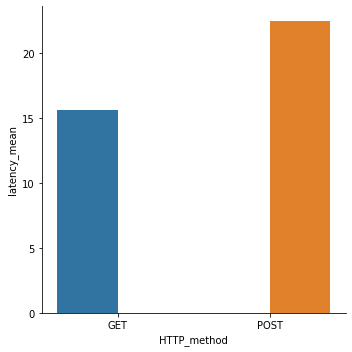

In [851]:
sns.catplot(x='HTTP_method', y='latency_mean', hue='HTTP_method', kind='bar', data=quarkusJVMDFRenamed)


### Quarkus Native application performance

In [852]:
quarkusNativePerfGetDF = pd.read_csv("reportQuarkusNativeGet.csv")
quarkusNativePerfGetDF['HTTP_method'] = 'GET'
quarkusNativePerfGetDF['requests_per_sec'] = 2177.64
quarkusNativePerfGetDF

,latency_min,latency_max,latency_mean,latency_stdev,latency_p50,latency_p90,latency_p95,latency_p99,rps,duration,requests,bytes,errors_connect,errors_read,errors_write,errors_status,errors_imeout,HTTP_method,requests_per_sec
0,0.427,26.13,4.639572,2154.942126,4.063,7.454,8.427,10.876,2177.635028,10001676,21780,1981980,0,0,0,0,0,GET,2177.64


In [853]:
quarkusNativePerfPostDF = pd.read_csv("reportQuarkusNativePost.csv")
quarkusNativePerfPostDF['HTTP_method'] = 'POST'
quarkusNativePerfPostDF['requests_per_sec'] = 1114.74
quarkusNativePerfPostDF.T

,0
latency_min,0.824
latency_max,45.995
latency_mean,9.01664
latency_stdev,2988.06
latency_p50,8.609
latency_p90,12.307
latency_p95,13.668
latency_p99,17.18
rps,1114.74
duration,10011325


In [854]:
quarkusNativePerfDF = pd.concat([quarkusNativePerfGetDF, quarkusNativePerfPostDF],axis=0, ignore_index=True)
quarkusNativePerfDFRenamed = quarkusNativePerfDF.rename(index={0: 'GET', 1 : 'POST'})
          
quarkusNativePerfDFRenamed.T

,GET,POST
latency_min,0.427,0.824
latency_max,26.13,45.995
latency_mean,4.63957,9.01664
latency_stdev,2154.94,2988.06
latency_p50,4.063,8.609
latency_p90,7.454,12.307
latency_p95,8.427,13.668
latency_p99,10.876,17.18
rps,2177.64,1114.74
duration,10001676,10011325


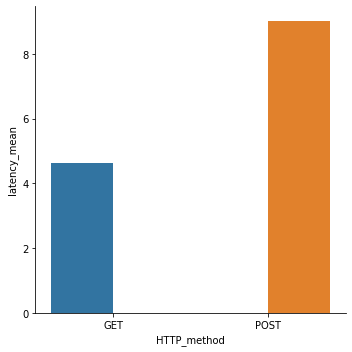

In [855]:
sns.catplot(x='HTTP_method', y='latency_mean', hue='HTTP_method', kind='bar', data=quarkusNativePerfDFRenamed)


### Spring Boot - warm up JVM application performance

In [856]:
springBootLongPerfGetDF = pd.read_csv("reportSpringGetLong.csv")
springBootLongPerfGetDF['HTTP_method'] = 'GET'
springBootLongPerfGetDF['requests_per_sec'] = 7136.70
springBootLongPerfGetDF.T

,0
latency_min,0.199
latency_max,402.72
latency_mean,1.54879
latency_stdev,4859.38
latency_p50,1.396
latency_p90,2.381
latency_p95,2.687
latency_p99,4.725
rps,7136.7
duration,900025647


In [857]:
springBootLongPerfPostDF = pd.read_csv("reportSpringPostLong.csv")
springBootLongPerfPostDF['HTTP_method'] = 'POST'
springBootLongPerfPostDF['requests_per_sec'] = 2778.57
springBootLongPerfPostDF.T

,0
latency_min,0.367
latency_max,438.586
latency_mean,3.76502
latency_stdev,5831.58
latency_p50,3.617
latency_p90,6.2
latency_p95,6.868
latency_p99,9.048
rps,2778.57
duration,900086042


In [858]:
springBootLongPerfDF = pd.concat([springBootLongPerfGetDF, springBootLongPerfPostDF],axis=0, ignore_index=True)
springBootLongPerfDFRenamed = springBootLongPerfDF.rename(index={0: 'GET', 1 : 'POST'})
          
springBootLongPerfDFRenamed.T

,GET,POST
latency_min,0.199,0.367
latency_max,402.72,438.586
latency_mean,1.54879,3.76502
latency_stdev,4859.38,5831.58
latency_p50,1.396,3.617
latency_p90,2.381,6.2
latency_p95,2.687,6.868
latency_p99,4.725,9.048
rps,7136.7,2778.57
duration,900025647,900086042


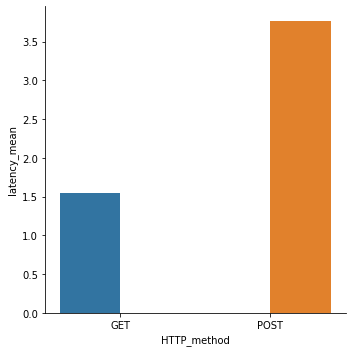

In [859]:
sns.catplot(x='HTTP_method', y='latency_mean', hue='HTTP_method', kind='bar', data=springBootLongPerfDFRenamed)


### Summary chart

In [860]:
springBootPerfGetDF = springBootPerfGetDF.filter(['latency_mean','requests_per_sec'], axis=1)
springBootPerfPostDF= springBootPerfPostDF.filter(['latency_mean','requests_per_sec'], axis=1)

quarkusJVMPerfGetDF= quarkusJVMPerfGetDF.filter(['latency_mean','requests_per_sec'], axis=1)
quarkusJVMPerfPostDF= quarkusJVMPerfPostDF.filter(['latency_mean','requests_per_sec'], axis=1)

quarkusNativePerfGetDF= quarkusNativePerfGetDF.filter(['latency_mean','requests_per_sec'], axis=1)
quarkusNativePerfPostDF= quarkusNativePerfPostDF.filter(['latency_mean','requests_per_sec'], axis=1)

springBootLongPerfGetDF= springBootLongPerfGetDF.filter(['latency_mean','requests_per_sec'], axis=1)
springBootLongPerfPostDF = springBootLongPerfPostDF.filter(['latency_mean','requests_per_sec'], axis=1)


In [861]:
springBootPerfGetDF.rename(columns={'latency_mean': 'GET_latency_mean', 'requests_per_sec': 'GET_requests_per_sec'}, inplace=True)
quarkusJVMPerfGetDF.rename(columns={'latency_mean': 'GET_latency_mean', 'requests_per_sec': 'GET_requests_per_sec'}, inplace=True)
quarkusNativePerfGetDF.rename(columns={'latency_mean': 'GET_latency_mean', 'requests_per_sec': 'GET_requests_per_sec'}, inplace=True)
springBootLongPerfGetDF.rename(columns={'latency_mean': 'GET_latency_mean', 'requests_per_sec': 'GET_requests_per_sec'}, inplace=True)


In [862]:
springBootPerfPostDF.rename(columns={'latency_mean': 'POST_latency_mean', 'requests_per_sec': 'POST_reequests_per_sec'}, inplace=True)
quarkusJVMPerfPostDF.rename(columns={'latency_mean': 'POST_latency_mean', 'requests_per_sec': 'POST_reequests_per_sec'}, inplace=True)
quarkusNativePerfPostDF.rename(columns={'latency_mean': 'POST_latency_mean', 'requests_per_sec': 'POST_reequests_per_sec'}, inplace=True)
springBootLongPerfPostDF.rename(columns={'latency_mean': 'POST_latency_mean', 'requests_per_sec': 'POST_reequests_per_sec'}, inplace=True)


In [863]:
springBootPerfDF = pd.concat([springBootPerfGetDF, springBootPerfPostDF],axis=1, ignore_index=False)
quarkusJVMPerfDF = pd.concat([quarkusJVMPerfGetDF, quarkusJVMPerfPostDF],axis=1, ignore_index=False)
quarkusNativePerfDF = pd.concat([quarkusNativePerfGetDF, quarkusNativePerfPostDF],axis=1, ignore_index=False)
springBootLongPerfDF = pd.concat([springBootLongPerfGetDF, springBootLongPerfPostDF],axis=1, ignore_index=False)


In [864]:
springBootPerfDF['Framework'] = 'Spring Boot'
quarkusJVMPerfDF['Framework'] = 'Quarkus JVM'
quarkusNativePerfDF['Framework'] = 'Quarkus Native'
springBootLongPerfDF['Framework'] = 'Spring Boot (warm up JVM)'

In [865]:
summaryDF = pd.concat([springBootPerfDF, quarkusJVMPerfDF,quarkusNativePerfDF,springBootLongPerfDF],axis=0, ignore_index=True)
summaryDF

,GET_latency_mean,GET_requests_per_sec,POST_latency_mean,POST_reequests_per_sec,Framework
0,11.405436,3239.68,14.413367,1623.40,Spring Boot
1,15.571699,1020.09,22.445490,643.53,Quarkus JVM
2,4.639572,2177.64,9.016637,1114.74,Quarkus Native
3,1.548790,7136.70,3.765016,2778.57,Spring Boot (warm up JVM)


In [866]:
summaryDF.dtypes

GET_latency_mean          float64
GET_requests_per_sec      float64
POST_latency_mean         float64
POST_reequests_per_sec    float64
Framework                  object
dtype: object

In [867]:
summaryRequestsDF = summaryDF.filter(['GET_requests_per_sec','POST_reequests_per_sec','Framework'])
summaryLatencyDF = summaryDF.filter(['GET_latency_mean','POST_latency_mean','Framework'])
summaryRequestsDF

,GET_requests_per_sec,POST_reequests_per_sec,Framework
0,3239.68,1623.40,Spring Boot
1,1020.09,643.53,Quarkus JVM
2,2177.64,1114.74,Quarkus Native
3,7136.70,2778.57,Spring Boot (warm up JVM)


In [868]:
summaryRequestsDFmelted = summaryRequestsDF.melt('Framework', var_name='Endpoint',  value_name='number')
summaryLatencyDFmelted = summaryLatencyDF.melt('Framework', var_name='Endpoint',  value_name='ms')


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


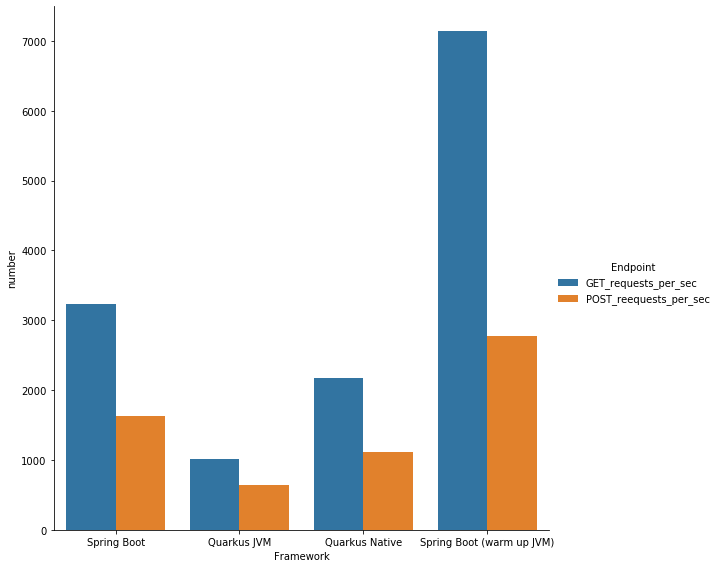

In [869]:
summaryRequestsPlot =sns.catplot(x="Framework", y="number", hue='Endpoint',kind='bar',  data=summaryRequestsDFmelted, size=8)


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


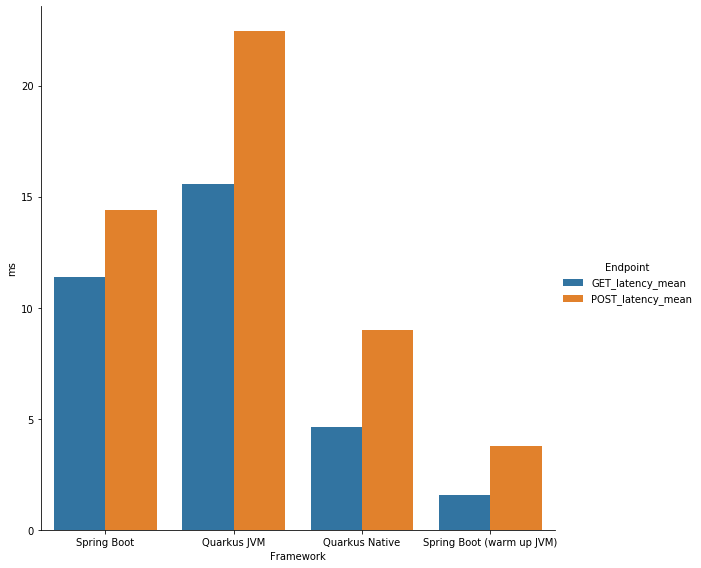

In [870]:
summaryLatencyPlot = sns.catplot(x="Framework", y="ms", hue='Endpoint',kind='bar',  data=summaryLatencyDFmelted, size=8)


In [871]:
summaryLatencyPlot.savefig("summaryLatencyPlot.png")
summaryRequestsPlot.savefig("summaryRequestsPlot.png")
appSizesPlot.savefig("appSizesPlot.png")

AttributeError: 'AxesSubplot' object has no attribute 'savefig'